# Infor

Also exemplify 2d animation, 3d and interactive plot

In [2]:
import numpy as np
from detection2d import detect_single
from wave2d import LinearRandomWave2D
import matplotlib.pyplot as plt

from ipywidgets import interactive
from celluloid import Camera
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

In [7]:
plt.rcParams.update({'font.size': 16})

# Get(load) the wave 

In [4]:
t_series = np.arange(0,100,5)
seed = 2
wave2d = LinearRandomWave2D()
wave2d.prepare_wave(seed)

#mesh, elev_series = wave2d.generate_wave(t_series=t_series)
#mesh, env_series = wave2d.generate_envelope(t_series=t_series)

mesh = np.load('data/mesh.npy')
elev_series = np.load('data/elev_series.npy')
env_series = np.load('data/env_series.npy')

levels = np.arange(-12, 12.1, 2)

# Plot the wave

<IPython.core.display.Javascript object>


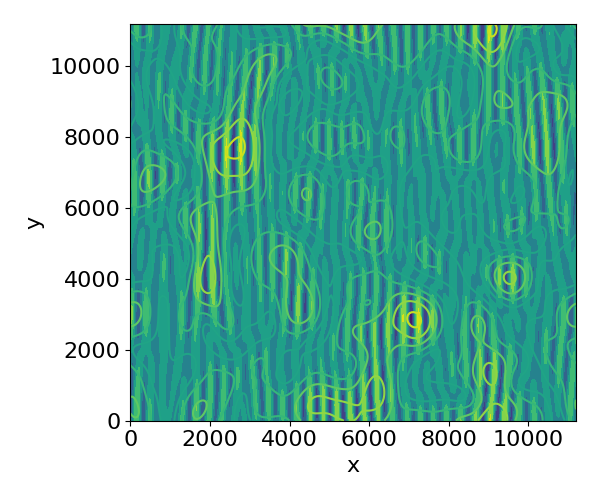

MovieWriter ffmpeg unavailable; using Pillow instead.


In [9]:
# 2d animation
%matplotlib notebook  

fig = plt.figure(figsize=(6,5))
camera = Camera(fig)
for i in range(len(elev_series)):
    plt.contourf(mesh[0], mesh[1], elev_series[i])
    plt.contour(mesh[0], mesh[1], env_series[i], levels=levels)
    plt.xlabel('x')
    plt.ylabel('y')
    camera.snap()
plt.tight_layout()
animation = camera.animate()
animation.save('plots/animation_2d.gif')

In [12]:
# 2d interactive plot
%matplotlib inline

def f(i):
    plt.figure(figsize=(6,5))
    plt.contourf(mesh[0], mesh[1], elev_series[i])
    plt.contour(mesh[0], mesh[1], env_series[i], levels=levels)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
interactive_plot = interactive(f, i=(0, 19))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=9, description='i', max=19), Output(layout=Layout(height='350px'))), _do…

<IPython.core.display.Javascript object>


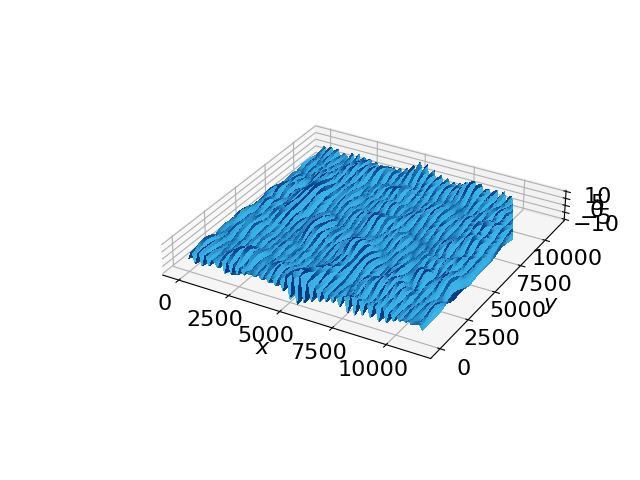

In [10]:
# generate 3d snapshot
%matplotlib notebook

blue_rgb = matplotlib.colors.ColorConverter().to_rgb('tab:blue')
colors = np.array([[blue_rgb for i in range(256)] for j in range(256)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ls = LightSource(90, 0)
rgb = ls.shade_rgb(colors, elev_series[0], blend_mode = 'soft')
ax.plot_surface(mesh[0], mesh[1], elev_series[0], shade=False, facecolors=rgb, 
                         rstride=1, cstride=1, linewidth=0, antialiased=False)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
# scale of different directions
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.25, 1.25, 0.2, 1]))
# the display view 
# view_init(elev=None, azim=None)
plt.savefig('plots/snap_3d.pdf')
plt.show()

In [ ]:
# generate 3d animation (a little bit slow)
%matplotlib notebook

blue_rgb = matplotlib.colors.ColorConverter().to_rgb('tab:blue')
colors = np.array([[blue_rgb for i in range(256)] for j in range(256)])

fig = plt.figure()
camera = Camera(fig)
ax = fig.add_subplot(111, projection='3d')
ls = LightSource(90, 0)
for i in range(len(elev_series)):
    rgb = ls.shade_rgb(colors, elev_series[i], blend_mode = 'soft')
    surf = x.plot_surface(mesh[0], mesh[1], elev_series[0], shade=False, facecolors=rgb, 
                         rstride=1, cstride=1, linewidth=0, antialiased=False)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    # scale of different directions
    ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.25, 1.25, 0.2, 1]))
    # the display view 
    # view_init(elev=None, azim=None)
    camera.snap()
animation = camera.animate()
animation.save('plots/animatioin_3d.gif') 

# Generate wave detection

### contourf: elevation
 
### contour: envelope 

### red dots: detected group centers

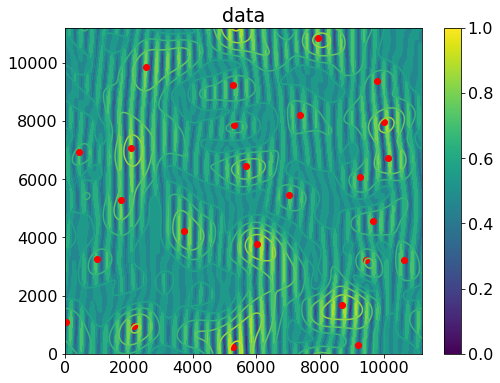

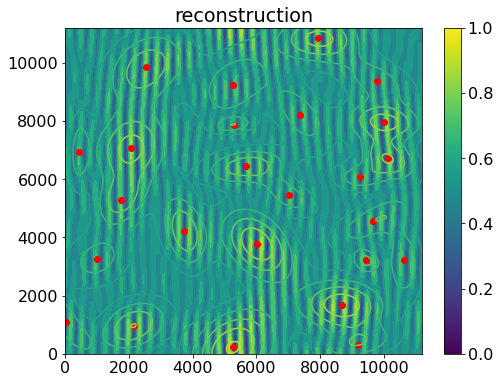

In [3]:
detect_single(2)